In [45]:
import pandas as pd 
df = pd.read_csv("/vol/tensusers6/aparikh/PhD/CTC-based-GOP/quantification/mpc_evaluation/forced_aligned_mpc2.csv")

In [ ]:
df.head()

# Taking first posterior probability 

In [ ]:
print(df.groupby("mispronounced")["gop_score"].describe())

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    confusion_matrix,
    mean_squared_error,
    mean_absolute_error
)

# Define thresholds at 20 evenly spaced percentiles
percentile_values = np.linspace(1, 100, 20)
thresholds = np.percentile(df['gop_score'], percentile_values)

# Initialize a list to store performance metrics for each threshold
threshold_metrics = []

for threshold in thresholds:
    # Apply threshold
    df['gop_predicted_varied'] = df['gop_score'] >= threshold  # Adjust comparison if needed
    # Compute metrics
    accuracy = accuracy_score(df['mispronounced'], df['gop_predicted_varied'])
    precision = precision_score(df['mispronounced'], df['gop_predicted_varied'], zero_division=0)
    recall = recall_score(df['mispronounced'], df['gop_predicted_varied'])
    f1 = f1_score(df['mispronounced'], df['gop_predicted_varied'])
    mcc = matthews_corrcoef(df['mispronounced'], df['gop_predicted_varied'])
    roc_auc = roc_auc_score(df['mispronounced'], df['gop_predicted_varied'])

    # Store threshold metrics
    threshold_metrics.append({
        "Threshold": threshold,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "MCC Score": mcc,
        "ROC AUC Score": roc_auc
    })

# Convert to DataFrame
threshold_df = pd.DataFrame(threshold_metrics)

threshold_df


In [ ]:
# Find the threshold where MCC is maximized
best_mcc_row = threshold_df.loc[threshold_df["MCC Score"].idxmax()]

# Print best threshold and corresponding metrics
print("Best Threshold for MCC:", best_mcc_row["Threshold"])
print("Metrics at Best MCC Threshold:")
print(best_mcc_row)

# Report AUC at the threshold where MCC is maximized
print("AUC Score when MCC is Max:", best_mcc_row["ROC AUC Score"])

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_true = df["mispronounced"].astype(int)
y_scores = df["gop_score"]

# Check if scores need inversion
roc_auc = roc_auc_score(y_true, y_scores)
if roc_auc < 0.0:
    y_scores = -y_scores  # Invert scores if AUC < 0.5
    roc_auc = roc_auc_score(y_true, y_scores)
print(f"ROC AUC: {roc_auc}")

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    confusion_matrix
)

y_pred = (y_scores >= 10.68).astype(int)

print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
print(f"Precision: {precision_score(y_true, y_pred)}")
print(f"Recall: {recall_score(y_true, y_pred)}")
print(f"F1 Score: {f1_score(y_true, y_pred)}")
print(f"MCC: {matthews_corrcoef(y_true, y_pred)}")

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

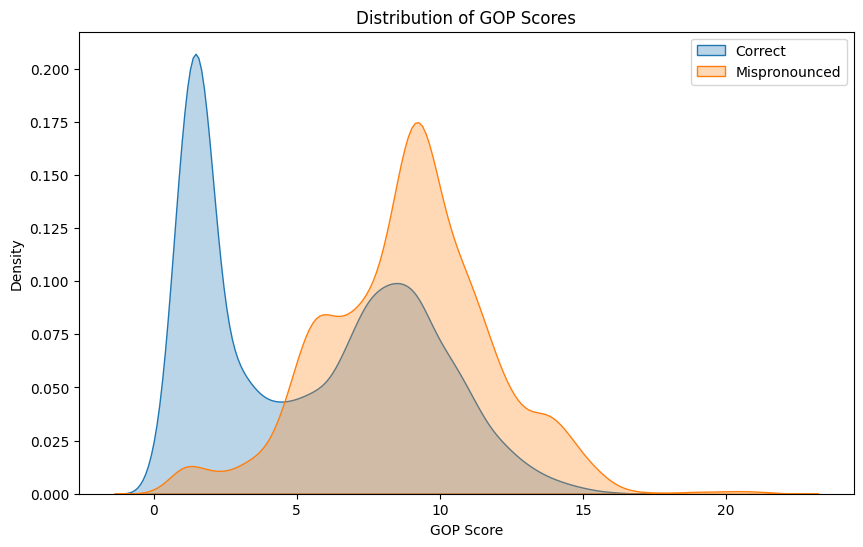

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

df["label"] = df["mispronounced"].astype(int)
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["label"] == 0]["gop_score"], label="Correct", fill=True, alpha=0.3)
sns.kdeplot(df[df["label"] == 1]["gop_score"], label="Mispronounced", fill=True, alpha=0.3)
plt.xlabel("GOP Score")
plt.title("Distribution of GOP Scores")
plt.legend()
plt.show()


# Mean Logit Margin

In [ ]:
df.head()

In [ ]:
print(df.groupby("mispronounced")["mean_logit_margin"].describe())

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    confusion_matrix,
    mean_squared_error,
    mean_absolute_error
)

# Define thresholds at 20 evenly spaced percentiles
percentile_values = np.linspace(1, 100, 20)
thresholds = np.percentile(df['mean_logit_margin'], percentile_values)

# Initialize a list to store performance metrics for each threshold
threshold_metrics = []

for threshold in thresholds:
    # Apply threshold
    df['gop_predicted_varied'] = df['mean_logit_margin'] <= threshold  # Adjust comparison if needed
    # Compute metrics
    accuracy = accuracy_score(df['mispronounced'], df['gop_predicted_varied'])
    precision = precision_score(df['mispronounced'], df['gop_predicted_varied'], zero_division=0)
    recall = recall_score(df['mispronounced'], df['gop_predicted_varied'])
    f1 = f1_score(df['mispronounced'], df['gop_predicted_varied'])
    mcc = matthews_corrcoef(df['mispronounced'], df['gop_predicted_varied'])
    roc_auc = roc_auc_score(df['mispronounced'], df['gop_predicted_varied'])

    # Store threshold metrics
    threshold_metrics.append({
        "Threshold": threshold,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "MCC Score": mcc,
        "ROC AUC Score": roc_auc
    })

# Convert to DataFrame
threshold_df = pd.DataFrame(threshold_metrics)

threshold_df


In [ ]:
# Find the threshold where MCC is maximized
best_mcc_row = threshold_df.loc[threshold_df["MCC Score"].idxmax()]

# Print best threshold and corresponding metrics
print("Best Threshold for MCC:", best_mcc_row["Threshold"])
print("Metrics at Best MCC Threshold:")
print(best_mcc_row)

# Report AUC at the threshold where MCC is maximized
print("AUC Score when MCC is Max:", best_mcc_row["ROC AUC Score"])

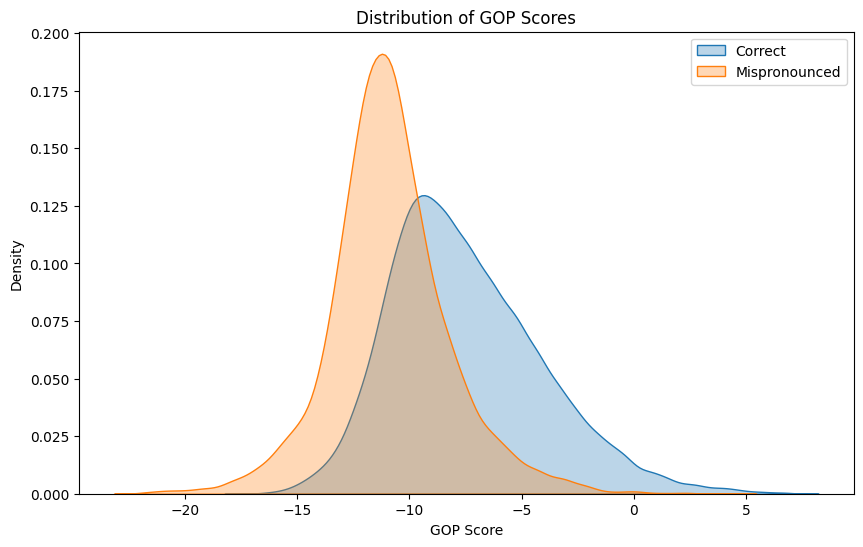

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

df["label"] = df["mispronounced"].astype(int)
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["label"] == 0]["mean_logit_margin"], label="Correct", fill=True, alpha=0.3)
sns.kdeplot(df[df["label"] == 1]["mean_logit_margin"], label="Mispronounced", fill=True, alpha=0.3)
plt.xlabel("GOP Score")
plt.title("Distribution of GOP Scores")
plt.legend()
plt.show()


# Maximum Logit

In [ ]:
print(df.groupby("mispronounced")["max_logit"].describe())

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    confusion_matrix,
    mean_squared_error,
    mean_absolute_error
)

# Define thresholds at 20 evenly spaced percentiles
percentile_values = np.linspace(1, 100, 20)
thresholds = np.percentile(df['max_logit'], percentile_values)

# Initialize a list to store performance metrics for each threshold
threshold_metrics = []

for threshold in thresholds:
    # Apply threshold
    df['gop_predicted_varied'] = df['max_logit'] <= threshold  # Adjust comparison if needed
    # Compute metrics
    accuracy = accuracy_score(df['mispronounced'], df['gop_predicted_varied'])
    precision = precision_score(df['mispronounced'], df['gop_predicted_varied'], zero_division=0)
    recall = recall_score(df['mispronounced'], df['gop_predicted_varied'])
    f1 = f1_score(df['mispronounced'], df['gop_predicted_varied'])
    mcc = matthews_corrcoef(df['mispronounced'], df['gop_predicted_varied'])
    roc_auc = roc_auc_score(df['mispronounced'], df['gop_predicted_varied'])

    # Store threshold metrics
    threshold_metrics.append({
        "Threshold": threshold,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "MCC Score": mcc,
        "ROC AUC Score": roc_auc
    })

# Convert to DataFrame
threshold_df = pd.DataFrame(threshold_metrics)

threshold_df


In [ ]:
# Find the threshold where MCC is maximized
best_mcc_row = threshold_df.loc[threshold_df["MCC Score"].idxmax()]

# Print best threshold and corresponding metrics
print("Best Threshold for MCC:", best_mcc_row["Threshold"])
print("Metrics at Best MCC Threshold:")
print(best_mcc_row)

# Report AUC at the threshold where MCC is maximized
print("AUC Score when MCC is Max:", best_mcc_row["ROC AUC Score"])

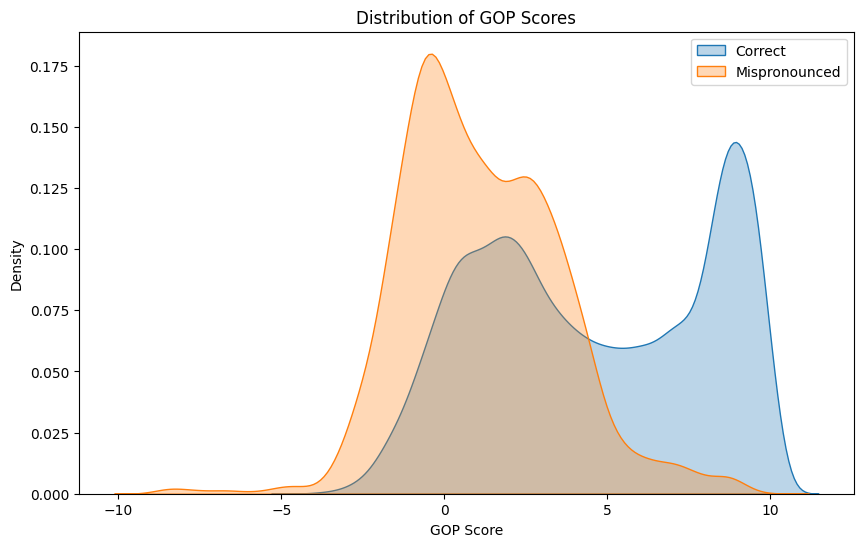

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

df["label"] = df["mispronounced"].astype(int)
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["label"] == 0]["max_logit"], label="Correct", fill=True, alpha=0.3)
sns.kdeplot(df[df["label"] == 1]["max_logit"], label="Mispronounced", fill=True, alpha=0.3)
plt.xlabel("GOP Score")
plt.title("Distribution of GOP Scores")
plt.legend()
plt.show()


# Logit Variance 

In [ ]:
print(df.groupby("mispronounced")["logit_variance"].describe())

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    confusion_matrix,
    mean_squared_error,
    mean_absolute_error
)

# Define thresholds at 20 evenly spaced percentiles
percentile_values = np.linspace(1, 100, 20)
thresholds = np.percentile(df['logit_variance'], percentile_values)

# Initialize a list to store performance metrics for each threshold
threshold_metrics = []

for threshold in thresholds:
    # Apply threshold
    df['gop_predicted_varied'] = df['logit_variance'] <= threshold  # Adjust comparison if needed
    # Compute metrics
    accuracy = accuracy_score(df['mispronounced'], df['gop_predicted_varied'])
    precision = precision_score(df['mispronounced'], df['gop_predicted_varied'], zero_division=0)
    recall = recall_score(df['mispronounced'], df['gop_predicted_varied'])
    f1 = f1_score(df['mispronounced'], df['gop_predicted_varied'])
    mcc = matthews_corrcoef(df['mispronounced'], df['gop_predicted_varied'])
    roc_auc = roc_auc_score(df['mispronounced'], df['gop_predicted_varied'])

    # Store threshold metrics
    threshold_metrics.append({
        "Threshold": threshold,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "MCC Score": mcc,
        "ROC AUC Score": roc_auc
    })

# Convert to DataFrame
threshold_df = pd.DataFrame(threshold_metrics)

threshold_df


In [ ]:
# Find the threshold where MCC is maximized
best_mcc_row = threshold_df.loc[threshold_df["MCC Score"].idxmax()]

# Print best threshold and corresponding metrics
print("Best Threshold for MCC:", best_mcc_row["Threshold"])
print("Metrics at Best MCC Threshold:")
print(best_mcc_row)

# Report AUC at the threshold where MCC is maximized
print("AUC Score when MCC is Max:", best_mcc_row["ROC AUC Score"])

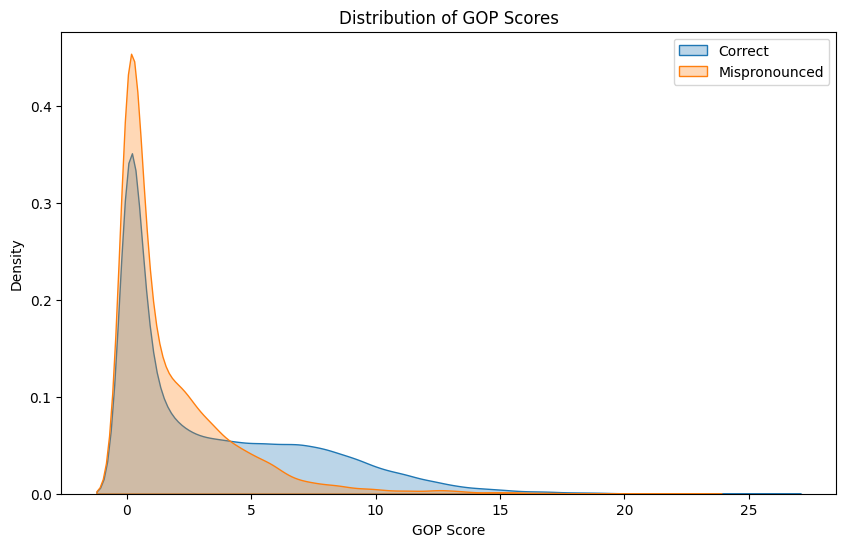

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

df["label"] = df["mispronounced"].astype(int)
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["label"] == 0]["logit_variance"], label="Correct", fill=True, alpha=0.3)
sns.kdeplot(df[df["label"] == 1]["logit_variance"], label="Mispronounced", fill=True, alpha=0.3)
plt.xlabel("GOP Score")
plt.title("Distribution of GOP Scores")
plt.legend()
plt.show()


# Max Logit Margin

In [ ]:
print(df.groupby("mispronounced")["max_logit_margin"].describe())

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    confusion_matrix,
    mean_squared_error,
    mean_absolute_error
)

# Define thresholds at 20 evenly spaced percentiles
percentile_values = np.linspace(1, 100, 50)
thresholds = np.percentile(df['max_logit_margin'], percentile_values)

# Initialize a list to store performance metrics for each threshold
threshold_metrics = []

for threshold in thresholds:
    # Apply threshold
    df['gop_predicted_varied'] = df['max_logit_margin'] <= threshold  # Adjust comparison if needed
    # Compute metrics
    accuracy = accuracy_score(df['mispronounced'], df['gop_predicted_varied'])
    precision = precision_score(df['mispronounced'], df['gop_predicted_varied'], zero_division=0)
    recall = recall_score(df['mispronounced'], df['gop_predicted_varied'])
    f1 = f1_score(df['mispronounced'], df['gop_predicted_varied'])
    mcc = matthews_corrcoef(df['mispronounced'], df['gop_predicted_varied'])
    roc_auc = roc_auc_score(df['mispronounced'], df['gop_predicted_varied'])

    # Store threshold metrics
    threshold_metrics.append({
        "Threshold": threshold,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "MCC Score": mcc,
        "ROC AUC Score": roc_auc
    })

# Convert to DataFrame
threshold_df = pd.DataFrame(threshold_metrics)
threshold_df

In [ ]:
# Find the threshold where MCC is maximized
best_mcc_row = threshold_df.loc[threshold_df["MCC Score"].idxmax()]

# Print best threshold and corresponding metrics
print("Best Threshold for MCC:", best_mcc_row["Threshold"])
print("Metrics at Best MCC Threshold:")
print(best_mcc_row)

# Report AUC at the threshold where MCC is maximized
print("AUC Score when MCC is Max:", best_mcc_row["ROC AUC Score"])

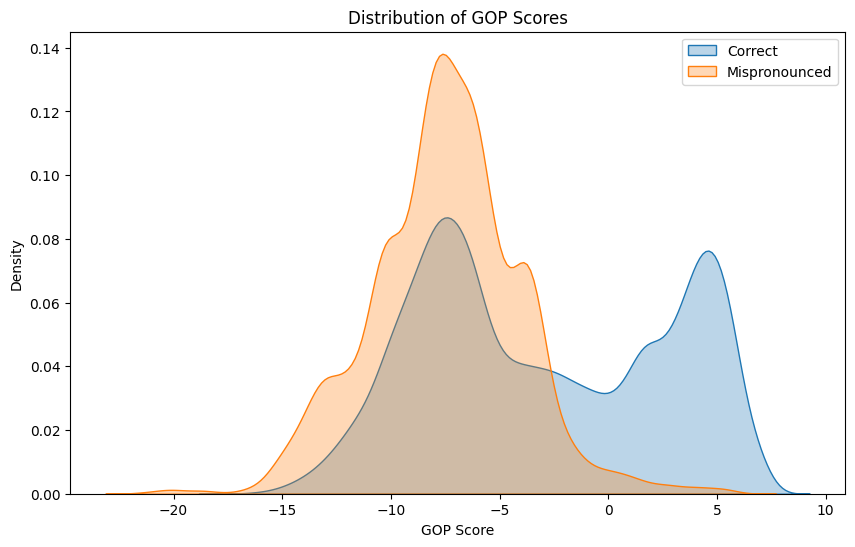

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

df["label"] = df["mispronounced"].astype(int)
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["label"] == 0]["max_logit_margin"], label="Correct", fill=True, alpha=0.3)
sns.kdeplot(df[df["label"] == 1]["max_logit_margin"], label="Mispronounced", fill=True, alpha=0.3)
plt.xlabel("GOP Score")
plt.title("Distribution of GOP Scores")
plt.legend()
plt.show()


# Margin Standard Deviation

In [83]:
df = pd.read_csv("/vol/tensusers6/aparikh/PhD/CTC-based-GOP/quantification/mpc_evaluation/forced_aligned_mpc3.csv")

In [ ]:
df.head()

In [ ]:
print(df.groupby("mispronounced")["combined_score"].describe())

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    confusion_matrix,
    mean_squared_error,
    mean_absolute_error
)

# Define thresholds at 20 evenly spaced percentiles
percentile_values = np.linspace(1, 100, 50)
thresholds = np.percentile(df['combined_score'], percentile_values)

# Initialize a list to store performance metrics for each threshold
threshold_metrics = []

for threshold in thresholds:
    # Apply threshold
    df['gop_predicted_varied'] = df['combined_score'] <= threshold  # Adjust comparison if needed
    # Compute metrics
    accuracy = accuracy_score(df['mispronounced'], df['gop_predicted_varied'])
    precision = precision_score(df['mispronounced'], df['gop_predicted_varied'], zero_division=0)
    recall = recall_score(df['mispronounced'], df['gop_predicted_varied'])
    f1 = f1_score(df['mispronounced'], df['gop_predicted_varied'])
    mcc = matthews_corrcoef(df['mispronounced'], df['gop_predicted_varied'])
    roc_auc = roc_auc_score(df['mispronounced'], df['gop_predicted_varied'])

    # Store threshold metrics
    threshold_metrics.append({
        "Threshold": threshold,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "MCC Score": mcc,
        "ROC AUC Score": roc_auc
    })

# Convert to DataFrame
threshold_df = pd.DataFrame(threshold_metrics)
threshold_df

In [ ]:
# Find the threshold where MCC is maximized
best_mcc_row = threshold_df.loc[threshold_df["MCC Score"].idxmax()]

# Print best threshold and corresponding metrics
print("Best Threshold for MCC:", best_mcc_row["Threshold"])
print("Metrics at Best MCC Threshold:")
print(best_mcc_row)

# Report AUC at the threshold where MCC is maximized
print("AUC Score when MCC is Max:", best_mcc_row["ROC AUC Score"])

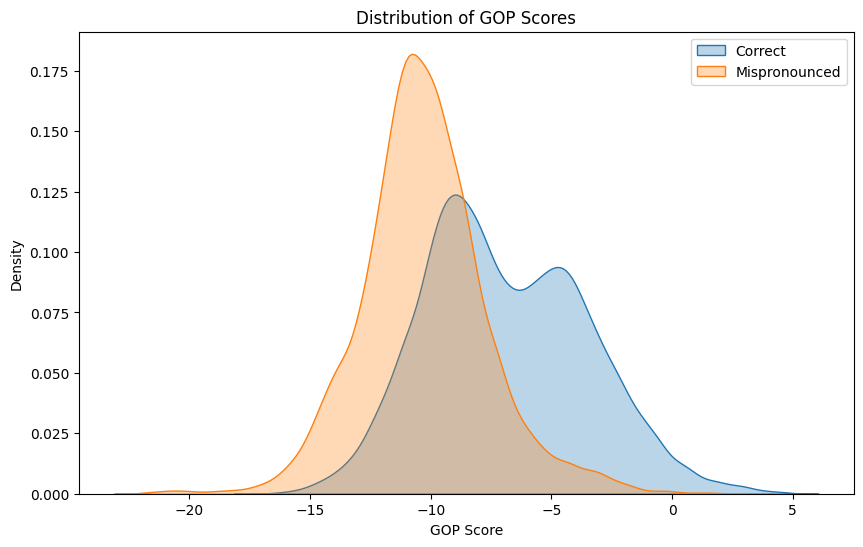

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

df["label"] = df["mispronounced"].astype(int)
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["label"] == 0]["combined_score"], label="Correct", fill=True, alpha=0.3)
sns.kdeplot(df[df["label"] == 1]["combined_score"], label="Mispronounced", fill=True, alpha=0.3)
plt.xlabel("GOP Score")
plt.title("Distribution of GOP Scores")
plt.legend()
plt.show()


In [2]:
import pandas as pd
df = pd.read_csv("/vol/tensusers6/aparikh/PhD/CTC-based-GOP/quantification/mpc_evaluation/forced_aligned_mpc4.csv")

/tmp/ipykernel_1584761/1307827176.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=10)


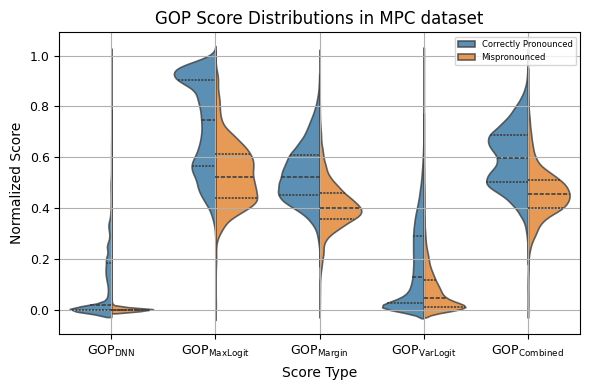

In [7]:
# Re-import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False 

# Selecting relevant columns for normalization
columns_to_normalize = [
    "posterior_prob", "max_logit", "mean_margin", "logit_variance", "combined_score"
]

# Normalizing the scores using Min-Max Scaler
scaler = MinMaxScaler()
df_new_normalized = df.copy()
df_new_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Melt the dataframe for visualization with mispronunciation status
df_melted_new = df_new_normalized.melt(
    id_vars=["mispronounced"], value_vars=columns_to_normalize, 
    var_name="Score Type", value_name="Normalized Score"
)

# Using LaTeX labels for better formatting
latex_labels = {
    "posterior_prob": r"$\mathrm{GOP}_{\mathrm{DNN}}$",
    "max_logit": r"$\mathrm{GOP}_{\mathrm{MaxLogit}}$",
    "mean_margin": r"$\mathrm{GOP}_{\mathrm{Margin}}$",
    "logit_variance": r"$\mathrm{GOP}_{\mathrm{VarLogit}}$",
    "combined_score": r"$\mathrm{GOP}_{\mathrm{Combined}}$"
}

# Replacing the labels in the melted DataFrame
df_melted_new["Score Type"] = df_melted_new["Score Type"].map(latex_labels)

# Creating a refined violin plot with better aesthetics and balanced widths
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)  # Larger for readability

# Plotting the violin plot with LaTeX-enhanced labels
sns.violinplot(
    x="Score Type", y="Normalized Score", hue="mispronounced", 
    data=df_melted_new, split=True, inner="quartile", linewidth=1.2, 
    alpha=0.8, ax=ax, density_norm='width'  # Ensuring equal width for both sides
)

# Formatting the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=10)
ax.set_title(r"GOP Score Distributions in MPC dataset", fontsize=12)
ax.set_xlabel("Score Type", fontsize=10)
ax.set_ylabel("Normalized Score", fontsize=10)

# Adjusting legend aesthetics to be clean and readable
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles, ["Correctly Pronounced", "Mispronounced"],  
    fontsize=6, title_fontsize=7, loc="upper right", frameon=True, markerscale=0.6
)


# Removing grid lines for a cleaner look
ax.grid(True)

plt.xticks(rotation=0, fontsize=9, ha="center")

# Adjusting tick sizes
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)


file_path = "MPC_VIOLIN_PLOT.png"
plt.savefig(file_path, dpi=600, format='png', bbox_inches='tight')



In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score
)


# List of score columns to evaluate
score_columns = [ "posterior_prob", "max_logit", "mean_margin", "logit_variance", "combined_score"]

# Dictionary to store best MCC rows for each score column
best_mcc_rows = {}

# Iterate over each score column
for score_col in score_columns:
    percentile_values = np.linspace(1, 100, 50)
    thresholds = np.percentile(df[score_col], percentile_values)

    threshold_metrics = []

    for threshold in thresholds:
        df["predicted_varied"] = df[score_col] <= threshold

        accuracy = accuracy_score(df["mispronounced"], df["predicted_varied"])
        precision = precision_score(df["mispronounced"], df["predicted_varied"], zero_division=0)
        recall = recall_score(df["mispronounced"], df["predicted_varied"])
        f1 = f1_score(df["mispronounced"], df["predicted_varied"])
        mcc = matthews_corrcoef(df["mispronounced"], df["predicted_varied"])
        roc_auc = roc_auc_score(df["mispronounced"], df["predicted_varied"])

        threshold_metrics.append({
            "Threshold": threshold,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "MCC Score": mcc,
            "ROC AUC Score": roc_auc
        })

    # Convert to DataFrame
    threshold_df = pd.DataFrame(threshold_metrics)

    # Find the best MCC row
    best_mcc_row = threshold_df.loc[threshold_df["MCC Score"].idxmax()]
    best_mcc_rows[score_col] = best_mcc_row

# Convert best MCC rows into a DataFrame
best_mcc_df = pd.DataFrame(best_mcc_rows).T

In [ ]:
best_mcc_df

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    confusion_matrix,
    mean_squared_error,
    mean_absolute_error
)

# Define thresholds at 20 evenly spaced percentiles
percentile_values = np.linspace(1, 100, 50)
thresholds = np.percentile(df['posterior_prob'], percentile_values)

# Initialize a list to store performance metrics for each threshold
threshold_metrics = []

for threshold in thresholds:
    # Apply threshold
    df['gop_predicted_varied'] = df['posterior_prob'] <= threshold  # Adjust comparison if needed
    # Compute metrics
    accuracy = accuracy_score(df['mispronounced'], df['gop_predicted_varied'])
    precision = precision_score(df['mispronounced'], df['gop_predicted_varied'], zero_division=0)
    recall = recall_score(df['mispronounced'], df['gop_predicted_varied'])
    f1 = f1_score(df['mispronounced'], df['gop_predicted_varied'])
    mcc = matthews_corrcoef(df['mispronounced'], df['gop_predicted_varied'])
    roc_auc = roc_auc_score(df['mispronounced'], df['gop_predicted_varied'])

    # Store threshold metrics
    threshold_metrics.append({
        "Threshold": threshold,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "MCC Score": mcc,
        "ROC AUC Score": roc_auc
    })

# Convert to DataFrame
threshold_df = pd.DataFrame(threshold_metrics)
threshold_df

In [ ]:
# Find the threshold where MCC is maximized
best_mcc_row = threshold_df.loc[threshold_df["MCC Score"].idxmax()]

# Print best threshold and corresponding metrics
print("Best Threshold for MCC:", best_mcc_row["Threshold"])
print("Metrics at Best MCC Threshold:")
print(best_mcc_row)

# Report AUC at the threshold where MCC is maximized
print("AUC Score when MCC is Max:", best_mcc_row["ROC AUC Score"])